<h1>Introduction</h1>
A research group in the Department of Computer Science at UBC has set up a Minecraft server to study how people play video games. They collect data in two main data frames: players.csv, which contains a list of all unique players along with demographic and player-level information, and sessions.csv, which records individual play sessions for each player, including session-level details.

In this project, we focus on the first dataset, players.csv, and investigate the question: “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between different types of players?"
Finally, we decided to predict whether the players' subscribe the Video Game based on their age and played time.

<h3>Addressing Question 1</h3>

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

<h3>The Specific Question</h3>

Can a player’s total playtime and age predict whether they subscribe to the newsletter?

<h3>Loading Data</h3>

In [75]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [76]:
url1='https://drive.google.com/uc?export=download&id=1LGq5BTBDuA8hTXNmLyc1A0I6Q0ifIL6e'
players<-read_csv(url1)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3> Data Description </h3>

**players.csv** dataset, containing information about 196 individual players on a Minecraft server, including their experience level, newsletter subscriptifon status, hashed email address, playtime, name, gender, and age.

The dataset includes seven variables. The table below summarizes each variable and its type.

<h3>Variables</h3>

 Variable Name | Type | Description | Example Value |
|----------------|------|--------------|----------------|
| `experience` | Categorical (`chr`) | Player’s skill level or rank. | `Pro` |
| `subscribe` | Boolean (`lgl`) | Indicates whether the player has an active subscription (TRUE) or not (FALSE). | `TRUE` |
| `hashedEmail` | String (`chr`) | Unique anonymized identifier for each player. | `f6daba4...` |
| `played_hours` | Numeric (`dbl`) | Total number of hours the player has spent playing. | `30.3` |
| `name` | String (`chr`) | Player’s first name. | `Morgan` |
| `gender` | Categorical (`chr`) | Player’s gender identity | `male` |
| `Age` | Numeric (`dbl`) | Player’s age in years. Contains some missing values (`NA`). | `17` |


<h3>Summary Statistic</h3>

In [77]:
players_summary<- players|>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
              min_played_hours = min(played_hours, na.rm = TRUE),
              max_played_hours = max(played_hours, na.rm = TRUE),
              missing_played_hours = round(mean(is.na(played_hours)) * 100, 2),
              mean_age = round(mean(Age, na.rm = TRUE), 2),
              min_age = min(Age, na.rm = TRUE),
              max_age = max(Age, na.rm = TRUE),
              missing_age = round(mean(is.na(Age)) * 100, 2))
players_summary

mean_played_hours,min_played_hours,max_played_hours,missing_played_hours,mean_age,min_age,max_age,missing_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,223.1,0,21.14,9,58,1.02


| Variable | Mean | Min | Max | Missing (%) |
|-----------|------|-----------|------|--------------|
| `played_hours` | *5.85* | *0* | *223.1* | 0% |
| `Age` | *21.14* | *9* | *58* | 1.02% |
---

<h3>Direct Observations and Problems</h3>

+ **Experience:** character variable. It shows the players experience level. The categories — “Amateur,” “Regular,” “Veteran,” and “Pro” — indicate increasing levels of game proficiency in that order, and it could be useful in predicting playtime

+ **subscribe:** logical variable. It indicates whether a player subscribed to the game.'True' means the player did subscribe the game, 'False' means 
the player did not subscribe the game.

+ **hashedEmail:** character variable. It is a anonnymized version of the player's email, but is not relevant for analysis.

+ **played_hours :** numeric variable. It shows the number of hours the player has spent on the game.

+ **name:** character variable. It is the display name chosen by each player in the game.

+ **gender:** character variable. It contains has many different responses, such as “Other”, “Two-Spirited”, “Prefer not to say”, etc, showing the gender of each player.

+ **Age：** numeric variable. It shows the player's age. It has some missing values, which must be handled before modelling

<h3>Other Potential Issue</h3>

- The data may not represent all types of players (for example, older players or casual players may be missing).
  
- Data by self-recording (such as age) may contain errors.

- The Age variable contains NA values. This may cause errors in many functions.

- The hashedEmail variable is not human-readable, it may be useless.

- If we want to predict subscribe, and it is not stored as a factor, we need to convert it first before running any classifier.

<h3>How the Data be Collected</h3>

<p> A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a Minecraft serverLinks to an external site., and players' actions are recorded as they navigate through the world. </p >

<h3>Variables Going to Use for Question</h3>

Response variable (y): subscribe

Explanatory variables (x): Age, played_hours 

<h3> How the Data Helps Address the Specific Question</h3>

This dataset provides the three information needed for this question, which are **total playtime**, **age**, and **subscription status** for each player. By focusing on these variables and removing missing values in Age, we may examine how playtime and age differ between subscribers and non-subscribers.

<h1> Methods and Results </h1>

<h3>Wrangle Dataset</h3>

To examine whether **age** and **total playtime** predict **newsletter subscription**, we first wrangle the dataset by converting subscribe into a factor, select these three variables, and remove rows with missing values.

In [78]:
players_clean<- players |> mutate(subscribe = as.factor(subscribe)) |> 
select(subscribe, Age, played_hours) |>
drop_na(Age, played_hours)
head(players_clean)

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0


<h3>Visualization of Data</h3>

And then, visualizing two histograms to examine whether subscribers exhibit distinct patterns in age and total playtime, followed by a scatterplot of age vs. playtime coloured by subscription status to explore potential patterns.

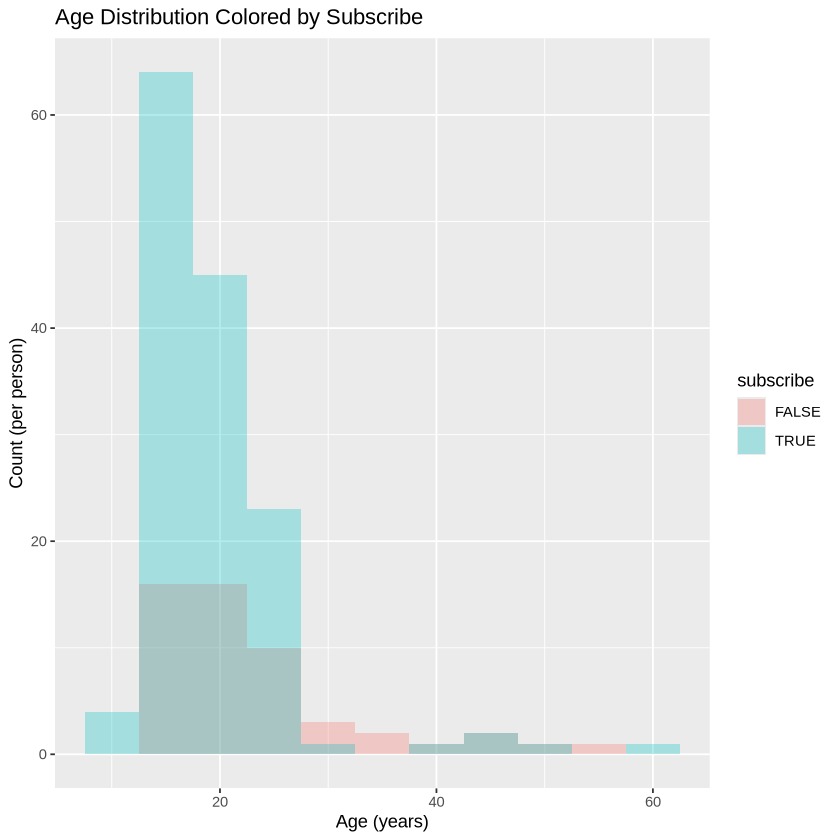

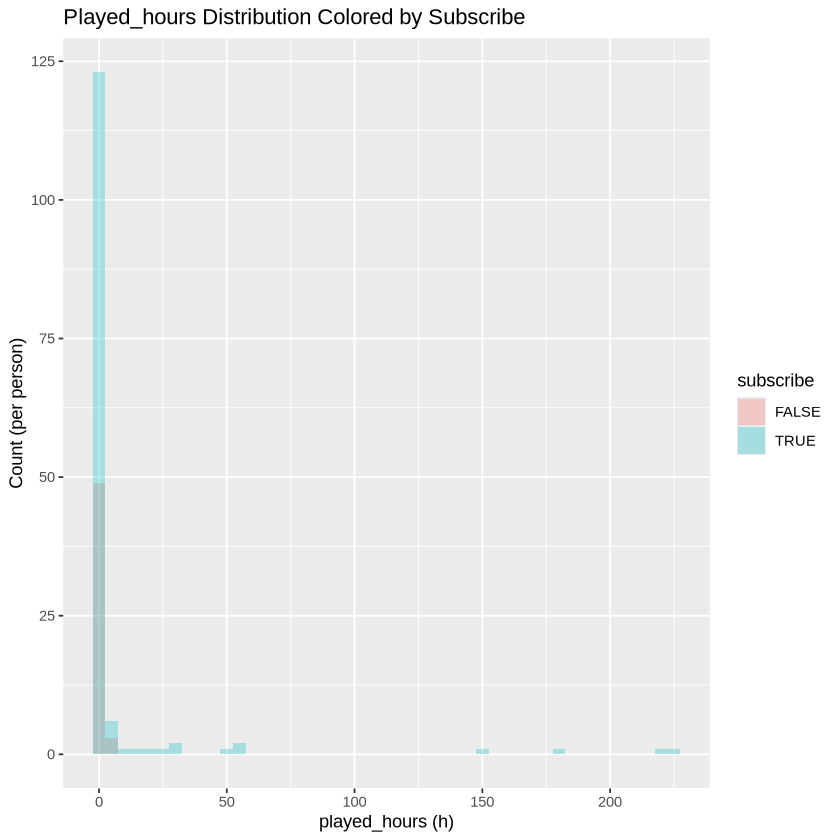

In [79]:
visualization_age_subscribe<- players_clean|>
            ggplot(aes(x = Age, fill = subscribe)) +
            geom_histogram(position = "identity", alpha = 0.3, binwidth = 5) +
            labs(title = "Age Distribution Colored by Subscribe",
                 x = "Age (years)",
                 y = "Count (per person)")
visualization_age_subscribe

visualization_playtime_subscribe<- players_clean|>
            ggplot(aes(x = played_hours, fill = subscribe)) +
            geom_histogram(position = "identity", alpha = 0.3, binwidth = 5) +
            labs(title = "Played_hours Distribution Colored by Subscribe",
                 x = "played_hours (h)",
                 y = "Count (per person)")
visualization_playtime_subscribe

By comparing the overlap between the two groups of the histograms, we can see a clear pattern in the age distribution: subscribers tend to be younger, with most of them falling between 13 and 17 years old. A similar pattern appears in the playtime distribution. Subscribers are more concentrated in the lower playtime range, especially between 0 and 5 total hours. This suggests that players who subscribe to the newsletter are generally newer or lighter users of the server.

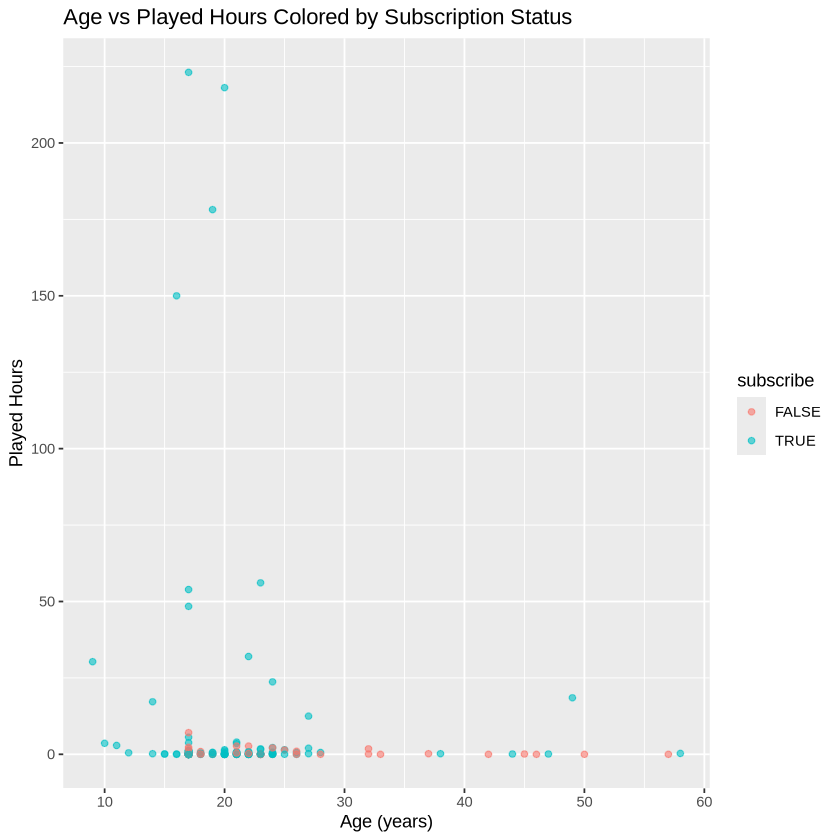

In [80]:
Age_played_hours <-players_clean |> 
  ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Age vs Played Hours Colored by Subscription Status",
    x = "Age (years)",
    y = "Played Hours") 
Age_played_hours

Following, We created the scatterplot of age versus total playtime, colored by subscription status, to see whether the relationship between these two variables differs for subscribed and non-subscribed players. 

The scatterplot shows that most players cluster at low playtime values (below 20 hours), and subscribers appear slightly more concentrated among the younger players. However, there is no strong linear trend, players of all ages generally have low playtime, and both groups show similar overall patterns. This suggests that age and playtime may provide only limited separation between subscribers and non-subscribers.



Looking at the played_hours side, many players who don’t subscribe have 0 hours played. But relying only on played_hours is not accurate, because some subscribed users barely play at all, and some non-subscribed users actually play for a long time. This led me to consider whether age might also influence a player’s decision to subscribe.

From the age side, both subscribed and non-subscribed players appear across almost all age groups, but most subscribed players are under 30 years old.

<h3>Predictive Data Analysis</h3>

Since we want to predict a user's subscription status (a binary variable, either `true` or `false`) by their age and total playtime, we will employ a **classification** algorithm for our analysis. More specifically, we plan to use the **K-nearest neighbors** algorithm to help us predict subscription status according to age and playtime.

First, we have to split our data into a training and testing set. We'll use the common 75:25 ratio to perform the split. We'll also set a global seed first to ensure the reproducibility of our analysis.

In [81]:
set.seed(123)

In [82]:
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

players_train
players_test

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
FALSE,22,0.0
FALSE,17,0.1
FALSE,23,0.0
⋮,⋮,⋮
TRUE,44,0.1
TRUE,17,0.0
TRUE,17,0.0


subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
⋮,⋮,⋮
TRUE,17,0
FALSE,17,0
TRUE,20,0


Next, we recognize that the scales of our two predictive variables, `Age` and `played_hours`, are different. Since the KNN algorithm is greatly sensitive to the scale of the predictors, we will do some preprocessing to standardize the data. We also foresee that we have a **value of interest** in mine, which is `subscribe` being `TRUE`, so we will *relevel* our data so that `TRUE` is internally recognized as the **first-level event**.

In [91]:
players_recipe <- recipe(subscribe ~ ., data = players_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

players_train <- players_train |> mutate(subscribe = relevel(subscribe, ref = "TRUE"))

We then perform **cross-validation** to select the most appropriate $K$ for our operation. We'll perform a **$10$-fold** cross-validation:

In [90]:
players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

Next, we create a KNN model specification that uses `tune()` to perform the cross-validation on a range of $K$:

In [93]:
knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

Now, put everything together into a workflow analysis and collect the metrics. Since we have a value of interest, we'll grab metrics for accuracy, precision, and recall. We'll test the cross-validation over a range of $K$ from $1$ to $30$, in accordance with common practice.

In [95]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

knn_metrics <- metric_set(accuracy, precision, recall)

knn_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = players_vfold, grid = k_vals, metrics = knn_metrics) |>
    collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4781319,10,0.03883003,Preprocessor1_Model01
1,precision,binary,0.7471825,10,0.05232643,Preprocessor1_Model01
1,recall,binary,0.4481818,10,0.06146438,Preprocessor1_Model01
⋮,⋮,⋮,⋮,⋮,⋮,⋮
30,accuracy,binary,0.7450183,10,0.009331589,Preprocessor1_Model30
30,precision,binary,0.7419414,10,0.007678001,Preprocessor1_Model30
30,recall,binary,1.0000000,10,0.000000000,Preprocessor1_Model30


We can visualize these results to help us more easily figure out which $K$ yields the highest of each metric.

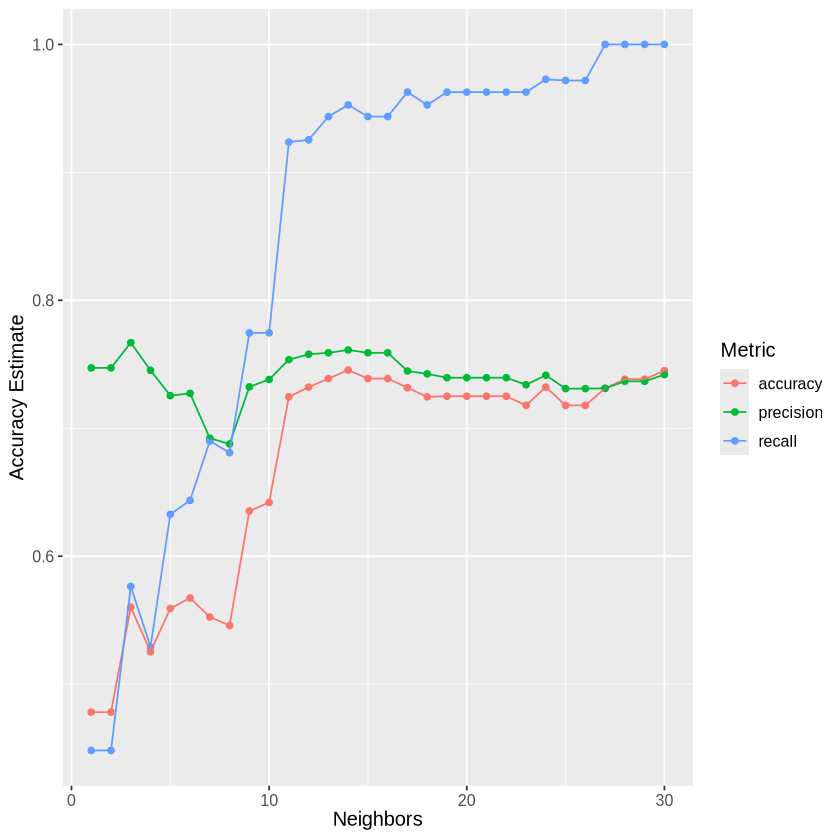

In [96]:
accuracy_plot <- ggplot(knn_results, aes(x = neighbors, y = mean, color = .metric)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", color = "Metric") +
    theme(text = element_text(size = 12))

accuracy_plot

From this graph, we can see that the most reasonable option for $K$ is $K=14$, where we achieve the most accuracy, the (almost) most precision, and a wonderfully high recall.

Now that we've got a definite $K$, we can create a new model specfication and workflow. Let's also relevel the testing set so that `TRUE` is the first-level event.

In [99]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
      set_engine("kknn") |>
      set_mode("classification")

players_fit <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_spec) |>
      fit(data = players_train)

players_test <- players_test |> mutate(subscribe = relevel(subscribe, ref = "TRUE"))

Now it's time to use our KNN algorithm to predict the subscription status of players in our testing set!

In [100]:
players_preds <- predict(players_fit, players_test) |> bind_cols(players_test)
players_preds

.pred_class,subscribe,Age,played_hours
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,17,3.8
TRUE,FALSE,17,0.0
TRUE,TRUE,21,0.7
⋮,⋮,⋮,⋮
TRUE,TRUE,17,0
TRUE,FALSE,17,0
TRUE,TRUE,20,0


Let's grab the accuracy, precision, and recall of the prediction, and also create a confusion matrix:

In [103]:
players_metrics <- players_preds |> 
    metrics(truth = subscribe, estimate = .pred_class) |>
    bind_rows(precision(players_preds, truth = subscribe, estimate = .pred_class), 
              recall(players_preds, truth = subscribe, estimate = .pred_class))
players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7551020
kap,binary,0.1671388
precision,binary,0.7608696
recall,binary,0.9722222


In [105]:
players_conf <- players_preds |> conf_mat(truth = subscribe, estimate = .pred_class)
players_conf

          Truth
Prediction TRUE FALSE
     TRUE    35    11
     FALSE    1     2

So we obtained an accuracy of approximately $75.5\%$, a precision of $76.1\%$, and a recall of $97\%$!